In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Wstęp

In [2]:
data = pd.read_csv('../data/taylor_swift.csv', parse_dates=['release_date'])
data

,name,artist,album,release_date,spotify_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,...Ready For It?,Taylor Swift,reputation,2017-11-10,2yLa0QULdQr0qAIvVwN6B5,71,0.052700,0.613,208187,0.764,0.000000,2,0.1970,-6.509,1,0.1360,160.015,0.4170
1,End Game,Taylor Swift,reputation,2017-11-10,2x0WlnmfG39ZuDmstl9xfX,72,0.008450,0.649,244827,0.589,0.000000,2,0.1080,-6.237,1,0.0558,159.073,0.1510
2,I Did Something Bad,Taylor Swift,reputation,2017-11-10,4svZDCRz4cJoneBpjpx8DJ,70,0.067900,0.696,238253,0.602,0.000021,0,0.0696,-6.156,0,0.1590,82.989,0.3050
3,Don’t Blame Me,Taylor Swift,reputation,2017-11-10,1R0a2iXumgCiFb7HEZ7gUE,69,0.106000,0.615,236413,0.534,0.000018,9,0.0607,-6.719,0,0.0386,135.917,0.1930
4,Delicate,Taylor Swift,reputation,2017-11-10,6NFyWDv5CjfwuzoCkw47Xf,78,0.216000,0.750,232253,0.404,0.000357,9,0.0911,-10.178,0,0.0682,95.045,0.0499
5,Look What You Made Me Do,Taylor Swift,reputation,2017-11-10,1P17dC1amhFzptugyAO7Il,70,0.204000,0.766,211853,0.709,0.000014,9,0.1260,-6.471,0,0.1230,128.070,0.5060
6,So It Goes...,Taylor Swift,reputation,2017-11-10,5PxFv9yJEg9dxvbZggykro,64,0.122000,0.574,227907,0.610,0.000001,2,0.1300,-7.283,1,0.0732,74.957,0.3740
7,Gorgeous,Taylor Swift,reputation,2017-11-10,1ZY1PqizIl78geGM4xWlEA,69,0.071300,0.800,209680,0.535,0.000009,7,0.2130,-6.684,1,0.1350,92.027,0.4510
8,Getaway Car,Taylor Swift,reputation,2017-11-10,0VE4kBnHJUgtMf0dy6DRmW,69,0.004650,0.562,233627,0.689,0.000002,2,0.0888,-6.745,1,0.1270,172.054,0.3510
9,King Of My Heart,Taylor Swift,reputation,2017-11-10,7HuBDWi18s4aJM8UFnNheH,67,0.008820,0.675,214320,0.703,0.000002,0,0.0391,-7.902,1,0.0382,110.010,0.3140


In [3]:
data.shape

(89, 18)

In [24]:
features = [
    'acousticness',
    'danceability',
    'duration_ms',
    'energy',
    'instrumentalness',
    'key',
    'liveness',
    'loudness',
    'mode',
    'speechiness',
    'tempo',
    'valence'
]

In [4]:
# konfiguracja wyświetlania wykresów
plt.rcParams['figure.dpi'] = 90

# Rozkład poszczególnych cech na dyskografii na przykładzie danceability

In [5]:
def draw_distribution(data, where, feature):
    def vertical_mean_line(x, **kwargs):
        plt.axvline(0.5, **kwargs)
        
    plot = sns.FacetGrid(data,
                         row=where,
                         height=2,
                         aspect=4)
    plot.map(sns.distplot,
            feature,
            hist=False,
            rug=True,
            color='purple',
            kde_kws={
                'shade': True
            })
    plot.map(vertical_mean_line, feature)
    plt.xlim(0, 1)

In [6]:
def draw_mean_barplot(data):
    mean_feature = data.groupby('album').mean().sort_values(by=chosen_feature)
    d = sns.barplot(data=mean_feature,
                   x=mean_feature.index,
                   y=mean_feature[chosen_feature],
                   palette='RdPu')
    d.set_xticklabels(d.get_xticklabels(),
                      rotation=70)
    mean_value = data[chosen_feature].mean()
    d.axhline(y=mean_value,
              linestyle='-.')

In [19]:
chosen_feature = 'energy'
chosen_data = data.loc[:, ['album', chosen_feature]]
chosen_data[chosen_feature] = data[chosen_feature] * data['duration_ms']

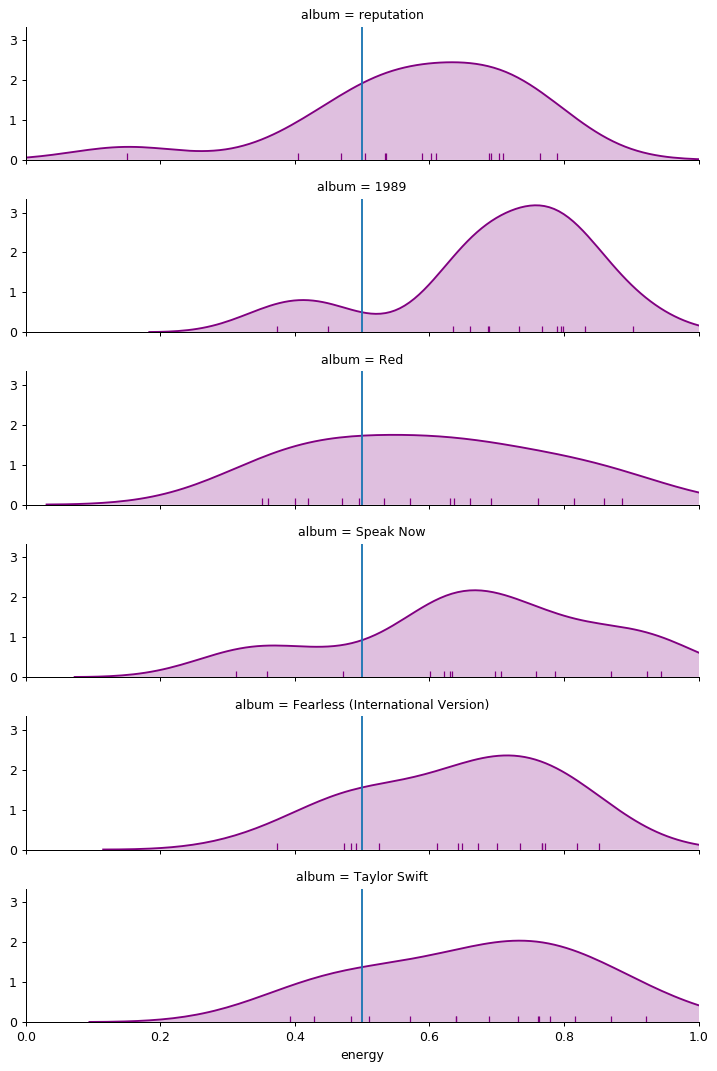

In [20]:
draw_distribution(data, 'album', chosen_feature)

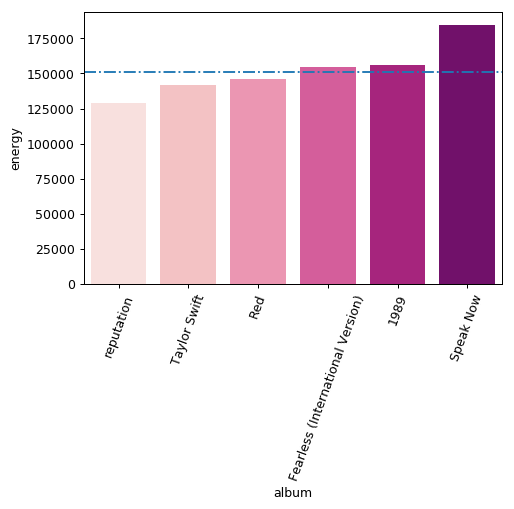

In [21]:
draw_mean_barplot(chosen_data)

## Czy da się pogrupować poszczególne albumy? Grupowanie hierarchiczne i dendrogram

In [22]:
import scipy.cluster.hierarchy as shc
from copy import deepcopy

In [25]:
data2 = deepcopy(data)
features2 = deepcopy(features)
features2.remove('duration_ms')
features2.remove('key')
features2.remove('mode')

In [26]:
for f in features2:
    data2[f] = data2[f] * data2['duration_ms']

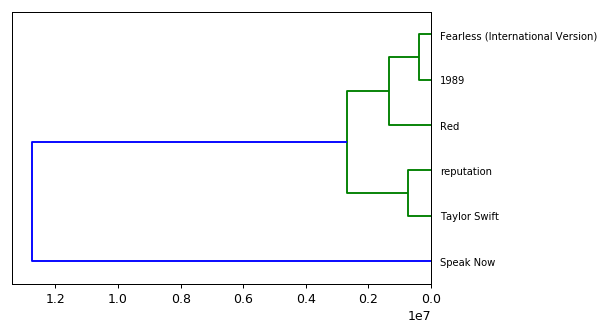

In [27]:
dend = data2.groupby('album').mean()
dendrogram = shc.dendrogram(shc.linkage(dend, method='ward'),
                            #leaf_rotation=90,
                            leaf_font_size=8,
                            labels=dend.index,
                            orientation="left")

## Rozkład popularności twórczości Taylor

Popularność danej piosenki determinują dwa czynniki: całkowita ilość odtworzeń w porównaniu do innych oraz **jak dawne są to odtworzenia**. Przez to z czasem, kiedy piosenka przestaje być słuchana z taką częstotliwością jak wcześniej, jej popularność spada.

Co więcej, jeśli na Spotify dostępne są **dwie różne wersje** danej piosenki (np. wersja z singla i z albumu), Spotify traktuje je jako **dwa różne utwory** (chociaż dane dot. charakterystyki muzycznej są takie same). W swoich danych ograniczyłam się do piosenek z albumów i EP, pomijając single.

C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


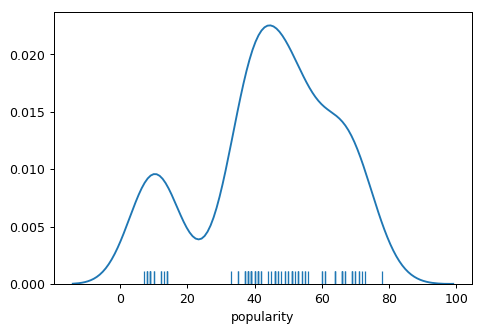

In [28]:
sns.distplot(data.popularity, rug=True, hist=False)

In [34]:
popular_data = data
popular_data['is_popular'] = popular_data.popularity >= 50
popular_data[popular_data.is_popular].head()

,name,artist,album,release_date,spotify_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,is_popular
0,...Ready For It?,Taylor Swift,reputation,2017-11-10,2yLa0QULdQr0qAIvVwN6B5,71,0.05270,0.613,208187,0.764,0.000000,2,0.1970,-6.509,1,0.1360,160.015,0.4170,True
1,End Game,Taylor Swift,reputation,2017-11-10,2x0WlnmfG39ZuDmstl9xfX,72,0.00845,0.649,244827,0.589,0.000000,2,0.1080,-6.237,1,0.0558,159.073,0.1510,True
2,I Did Something Bad,Taylor Swift,reputation,2017-11-10,4svZDCRz4cJoneBpjpx8DJ,70,0.06790,0.696,238253,0.602,0.000021,0,0.0696,-6.156,0,0.1590,82.989,0.3050,True
3,Don’t Blame Me,Taylor Swift,reputation,2017-11-10,1R0a2iXumgCiFb7HEZ7gUE,69,0.10600,0.615,236413,0.534,0.000018,9,0.0607,-6.719,0,0.0386,135.917,0.1930,True
4,Delicate,Taylor Swift,reputation,2017-11-10,6NFyWDv5CjfwuzoCkw47Xf,78,0.21600,0.750,232253,0.404,0.000357,9,0.0911,-10.178,0,0.0682,95.045,0.0499,True


## Czy najpopularniejsze piosenki Taylor mają podobne parametry muzyczne? PCA

In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [36]:
x = data.loc[:, features].values
y = data.loc[:, ['is_popular']].values

In [37]:
x = StandardScaler().fit_transform(x)

In [38]:
pca = PCA(n_components=2)

In [39]:
principal_components = pca.fit_transform(x)

In [40]:
principal_data = pd.DataFrame(data=principal_components,
                             columns=['PC1', 'PC2'])

In [41]:
final_data = pd.concat([principal_data, data.is_popular], axis=1)

In [42]:
final_data.head()

,PC1,PC2,is_popular
0,-1.451444,0.694920,True
1,0.408962,-0.386063,True
2,0.002294,2.022375,True
3,0.376451,-0.228281,True
4,1.923816,1.372048,True


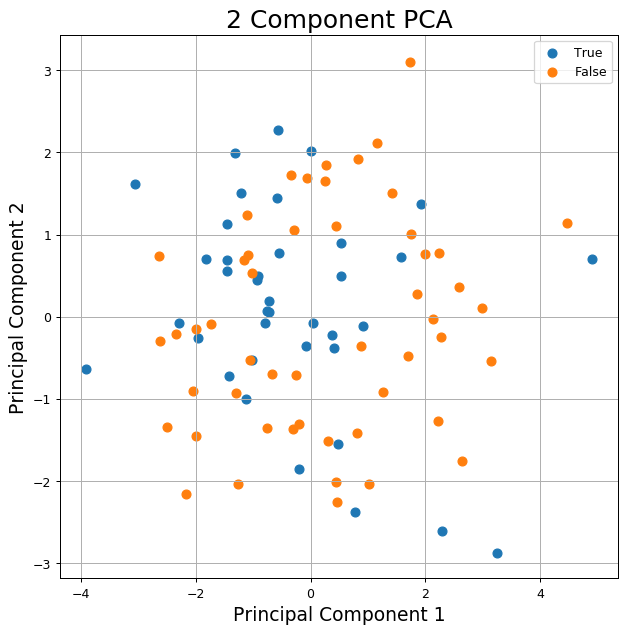

In [43]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
ax.grid()

targets = [True, False]
colors = [
    'tab:blue',
    'tab:orange'
]
for target, color in zip(targets, colors):
    indicesToKeep = final_data['is_popular'] == target
    ax.scatter(final_data.loc[indicesToKeep, 'PC1'],
               final_data.loc[indicesToKeep, 'PC2'],
               c = color,
               s = 50)
ax.legend(targets)